
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as pl
import seaborn as sns

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())

duplicates = df_plans.duplicated().sum()
print("En la tabla Plans exiten: ", duplicates , "valores duplicados")

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
En la tabla Plans exiten:  0 valores duplicados


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<font color='#571EEB'>Realizando un analisis muy meticuloso en los datos de este Data Frame, se puede llegar a concluir que no existen problemas significantes en los datos. No hay datos ausentes, todos los tipos de datos son correctos, y la información coincide con la descripción de las dos tarifas mencionadas.</font>  

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

<font color='#571EEB'>Realizando un analisis de los datos de las Tarifas, como se tendrá que realizar operaciones con los datos de la columna "mb_per_month_included" se debe realizar una transformación de MB a GB en esta columna.</font>


In [5]:
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included'].apply(lambda x: round(x / 1024, 2))
                                                                            
print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    No se si lo que realice esté correcto. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Ariel! Es correcta la forma en la que lo realizaste. Excelente trabajo!
</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
print(df_users.sample(10))

duplicates = df_users.duplicated().sum()
print("En la tabla Users exiten: ", duplicates , "valores duplicados")

absents_users = df_users['churn_date'].isna().sum()
print("Existen: ", absents_users , "valores ausentes en la columna churn_date")

     user_id first_name  last_name  age  \
206     1206    Angelic  Singleton   21   
256     1256     Johnny       Wise   53   
475     1475      Arlen     Sutton   66   
439     1439      Moses    Cabrera   28   
46      1046      Beata     Hooper   67   
79      1079      Brian     Mccall   48   
176     1176   Terrance    Shaffer   75   
47      1047        Yuk     French   22   
141     1141    Kirstie     Hodges   46   
318     1318       Huey      Walsh   54   

                                          city    reg_date      plan  \
206              Providence-Warwick, RI-MA MSA  2018-07-09      surf   
256     Chicago-Naperville-Elgin, IL-IN-WI MSA  2018-09-11      surf   
475        Dallas-Fort Worth-Arlington, TX MSA  2018-05-28  ultimate   
439   Riverside-San Bernardino-Ontario, CA MSA  2018-01-04      surf   
46          Boston-Cambridge-Newton, MA-NH MSA  2018-02-19      surf   
79   New York-Newark-Jersey City, NY-NJ-PA MSA  2018-01-26      surf   
176  New York-Newark-J

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<font color='#571EEB'>Al realizar un análisis a este conjunto de datos se pude concluir lo siguiente: primero, a mi parecer el identificador de un usuario no debería ser de tipo entero, pues jamas se realizará algun tipo de operación aritmetica con este dato; segundo, existen muchos datos ausentes que se sabe que es debido a que los usuarios aún tenían los planes activados, por lo cual lo mas optimo es conservar esos datos ausentes y agregar una nueva columna para saber si un usuario esta activo o no.</font>

<font color='#571EEB'> Nota: A menos se que realice un análisis de datos directamente con la base de datos SQLserver, ya que en ese caso, la consulta de datos tipo integer es mas veloz a comparación a la consulta de datos tipo string (object).
</font>  

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
# Convertir la columna 'user_id' a tipo objeto (string)
df_users['user_id'] = df_users['user_id'].astype(str)

# Verificar el nuevo tipo de la columna 'user_id'
print(df_users['user_id'].dtype)

#Transformar los datos de reg_date en tipo datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

# Mostrar el DataFrame para confirmar el cambio
df_users.info()

object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
# Crear una nueva columna 'is_active' basada en la presencia de valores nulos en 'churn_date'
df_users['is_active'] = df_users['churn_date'].isna()
print(df_users.sample(5))

    user_id first_name  last_name  age  \
477    1477     Magaly      Rivas   52   
52     1052     Edmond    Hopkins   47   
286    1286      Casie  Castaneda   52   
333    1333       Macy      David   57   
12     1012    Jonelle    Mcbride   59   

                                         city   reg_date      plan  \
477  Riverside-San Bernardino-Ontario, CA MSA 2018-08-24  ultimate   
52   Houston-The Woodlands-Sugar Land, TX MSA 2018-03-05      surf   
286                 New Haven-Milford, CT MSA 2018-12-07      surf   
333    Los Angeles-Long Beach-Anaheim, CA MSA 2018-11-24  ultimate   
12     Chicago-Naperville-Elgin, IL-IN-WI MSA 2018-06-28      surf   

     churn_date  is_active  
477         NaN       True  
52          NaN       True  
286         NaN       True  
333         NaN       True  
12   2018-11-16      False  


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la transformación de reg_date a un datatime puedes hacer uso de la siguiente función:
    
    pd.to_datetime(user['reg_date'], format='%Y-%m-%d')
    
te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas. Los mismo para las otras variables que son fechas de otras bases de datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
print(df_calls.sample(10))

duplicates = df_calls.duplicated().sum()
print("En la tabla Calls exiten: ", duplicates , "valores duplicados")

absents_calls = df_calls['id'].isna().sum()
print("Existen: ", absents_calls , "valores ausentes en la columna id")

              id  user_id   call_date  duration
70930   1252_337     1252  2018-06-16      2.82
21326    1079_39     1079  2018-11-18     14.65
120968  1423_165     1423  2018-10-30      3.40
120678   1421_20     1421  2018-11-15      4.23
101048  1361_150     1361  2018-09-28      1.18
30633   1114_565     1114  2018-11-28      4.73
77327   1277_403     1277  2018-09-28     13.51
37501   1141_522     1141  2018-10-23      9.14
126514    1450_8     1450  2018-12-11      0.00
113291   1398_74     1398  2018-12-27     12.07
En la tabla Calls exiten:  0 valores duplicados
Existen:  0 valores ausentes en la columna id


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<font color='#571EEB'>Al realizar un análisis a este conjunto de datos se pude concluir que el único cambio que yo aplicaría es cambiar el tipo de dato object por un datetime en la columna "call_date" debido al trabajo que se debe realizar en el punto 1.12.</font>  

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
# Convertir la columna 'user_id' a tipo integer 
df_calls['user_id'] = df_calls['user_id'].astype(int)

# Convertir la columna 'call_date' a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],  format='%Y-%m-%d')

# Mostrar el DataFrame para confirmar el cambio
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    Se realiza un análisis exhaustivo de los datos de la tabla "calls" y se puede observar que existen llamadas con duración de 0. Estas llamadas pueden tener muchos significados: 
       * Llamadas fallidas o no contestadas.
       * Llamadas colgadas inmediatamente. 
       * Errores en los datos: Resultado de errores de grabación de llamadas o procesamiento de los datos. 
       * Llamadas de prueba o de sistemas automatizados: Llamadas realizadas por sistemas automatizados para pruebas o                  verificaciones. 

    Como las llamadas con duración 0 no generan ingresos, pueden llegar a distorsionar el análisis de los ingresos generados por los diferentes planes. Por lo cual, se llega a la conclusión de que sería mejor eliminarlos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [13]:
calls_with_zero_duration = df_calls.query('duration == 0')

print(calls_with_zero_duration)


df_calls = df_calls[df_calls['duration'] != 0]

calls_with_zero_duration = df_calls.query('duration == 0')

print(calls_with_zero_duration)


              id  user_id  call_date  duration
19        1001_4     1001 2018-12-05       0.0
25       1001_13     1001 2018-12-24       0.0
31       1001_30     1001 2018-10-17       0.0
32       1001_31     1001 2018-11-03       0.0
34       1001_35     1001 2018-12-21       0.0
...          ...      ...        ...       ...
137714  1499_183     1499 2018-11-10       0.0
137715  1499_184     1499 2018-09-15       0.0
137720  1499_189     1499 2018-12-27       0.0
137722  1499_191     1499 2018-12-24       0.0
137725  1499_194     1499 2018-10-31       0.0

[26834 rows x 4 columns]
Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    Llegué a la conclusión de que no son importantes para el análisis por lo cual los elimine.  
</div>

## Mensajes

In [14]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
print(df_messages.sample(10))

duplicates = df_messages.duplicated().sum()
print("En la tabla Messages exiten: ", duplicates , "valores duplicados")

absents_messages = df_messages['message_date'].isna().sum()
print("Existen: ", absents_messages , "valores ausentes en la columna 'message_date'")

             id  user_id message_date
34112   1215_26     1215   2018-12-03
73189  1470_817     1470   2018-11-08
37506   1248_70     1248   2018-12-14
36034   1237_55     1237   2018-10-14
37944  1250_197     1250   2018-12-30
57308  1362_386     1362   2018-07-02
20695   1131_34     1131   2018-10-24
68126  1439_520     1439   2018-09-12
55277  1347_314     1347   2018-09-01
49767  1328_725     1328   2018-10-21
En la tabla Messages exiten:  0 valores duplicados
Existen:  0 valores ausentes en la columna 'message_date'


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<font color='#571EEB'>Al realizar un análisis a este conjunto de datos se pude concluir que el único cambio que yo aplicaría es cambiar el tipo de dato object por un datetime en la columna "message_date" debido al trabajo que se debe realizar en el punto 1.12..</font>  

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
# Convertir la columna 'user_id' a tipo objeto (string)
df_messages['user_id'] = df_messages['user_id'].astype(int)

# Convertir la columna 'call_date' a datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# Mostrar el DataFrame para confirmar el cambio
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.sample(10))

duplicates = df_internet.duplicated().sum()
print("En la tabla Internet exiten: ", duplicates , "valores duplicados")

def contar_valores_ausentes(df, columna):
    # Contar los valores ausentes en la columna dada
    valores_ausentes = df[columna].isna().sum()
    # Crear el mensaje
    mensaje = f"Existen: {valores_ausentes} valores ausentes en la columna '{columna}'"
    # Devolver el mensaje
    return mensaje

# Llamar a la función y mostrar el resultado
print(contar_valores_ausentes(df_internet, 'session_date'))


             id  user_id session_date  mb_used
74518    1351_4     1351   2018-11-28   636.65
92308  1430_417     1430   2018-12-26   329.17
1754   1009_289     1009   2018-07-30   617.98
53579   1241_64     1241   2018-12-28   839.36
8041   1043_103     1043   2018-07-04   164.53
74683   1352_19     1352   2018-12-31   463.08
832    1004_519     1004   2018-11-17   415.68
73590  1346_171     1346   2018-05-22     0.00
9503   1049_153     1049   2018-11-24   489.09
36976  1166_142     1166   2018-11-12   237.59
En la tabla Internet exiten:  0 valores duplicados
Existen: 0 valores ausentes en la columna 'session_date'


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<font color='#571EEB'>Al realizar un análisis a este conjunto de datos se pude concluir que el único cambio que yo aplicaría es cambiar el tipo de dato object por un datetime en la columna "session_date" debido al trabajo que se debe realizar en el punto 1.12</font> 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
# Convertir la columna 'user_id' a tipo objeto (string)
df_internet['user_id'] = df_internet['user_id'].astype(int)

# Convertir la columna 'call_date' a datetime]
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# Mostrar el DataFrame para confirmar el cambio
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [20]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [21]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Extraer el año y el mes de la columna 'call_date'
df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'year_month' y contar el número de llamadas
user_calls_per_month = df_calls.groupby(['user_id', 'year_month']).size().reset_index(name='num_llamadas')

# Mostrar el resultado
print(user_calls_per_month)

absents = user_calls_per_month['num_llamadas'].isna().sum()
print("Existen: ", absents , "valores ausentes en la columna num_llamadas")

      user_id year_month  num_llamadas
0        1000    2018-12            16
1        1001    2018-08            22
2        1001    2018-09            38
3        1001    2018-10            47
4        1001    2018-11            49
...       ...        ...           ...
2251     1498    2018-12            32
2252     1499    2018-09            35
2253     1499    2018-10            41
2254     1499    2018-11            39
2255     1499    2018-12            56

[2256 rows x 3 columns]
Existen:  0 valores ausentes en la columna num_llamadas


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [22]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Extraer el año y el mes de la columna 'call_date'
df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'year_month' y contar el número de llamadas
minutes_per_user_per_month = df_calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index(name='minutes_per_month')

# Mostrar el resultado
print(minutes_per_user_per_month)

absents = minutes_per_user_per_month['minutes_per_month'].isna().sum()
print("Existen: ", absents , "valores ausentes en la columna minutes_per_month")

      user_id year_month  minutes_per_month
0        1000    2018-12             116.83
1        1001    2018-08             171.14
2        1001    2018-09             297.69
3        1001    2018-10             374.11
4        1001    2018-11             404.59
...       ...        ...                ...
2251     1498    2018-12             324.77
2252     1499    2018-09             330.37
2253     1499    2018-10             363.28
2254     1499    2018-11             288.56
2255     1499    2018-12             468.10

[2256 rows x 3 columns]
Existen:  0 valores ausentes en la columna minutes_per_month


In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Extraer año y mes de 'call_date'
df_messages['year_month'] = df_messages['message_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'year_month' y sumar la duración de las llamadas
messages_per_user_per_month = df_calls.groupby(['user_id', 'year_month'])['duration'].size().reset_index(name='num_messages')

# Mostrar el resultado
print(messages_per_user_per_month)

absents = messages_per_user_per_month['num_messages'].isna().sum()
print("Existen: ", absents , "valores ausentes en la columna num_messages")

      user_id year_month  num_messages
0        1000    2018-12            16
1        1001    2018-08            22
2        1001    2018-09            38
3        1001    2018-10            47
4        1001    2018-11            49
...       ...        ...           ...
2251     1498    2018-12            32
2252     1499    2018-09            35
2253     1499    2018-10            41
2254     1499    2018-11            39
2255     1499    2018-12            56

[2256 rows x 3 columns]
Existen:  0 valores ausentes en la columna num_messages


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Extraer el año y el mes de la columna 'call_date'
df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'year_month' y contar el número de llamadas
internet_traffic_of_users_per_month = df_internet.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index(name='internet_traffic_mb')

# Mostrar el resultado

print(internet_traffic_of_users_per_month)

      user_id year_month  internet_traffic_mb
0        1000    2018-12              1901.47
1        1001    2018-08              6919.15
2        1001    2018-09             13314.82
3        1001    2018-10             22330.49
4        1001    2018-11             18504.30
...       ...        ...                  ...
2272     1498    2018-12             23137.69
2273     1499    2018-09             12984.76
2274     1499    2018-10             19492.43
2275     1499    2018-11             16813.83
2276     1499    2018-12             22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Realizar la combinación
df_user_data = pd.merge(user_calls_per_month, internet_traffic_of_users_per_month, on=['user_id', 'year_month'], how='outer')

df_user_data = pd.merge(df_user_data, minutes_per_user_per_month, on=['user_id', 'year_month'], how='outer')

df_user_data = pd.merge(df_user_data, messages_per_user_per_month, on=['user_id', 'year_month'], how='outer')

# Mostrar el resultado
print(df_user_data)

df_user_data.info()


      user_id year_month  num_llamadas  internet_traffic_mb  \
0        1000    2018-12          16.0              1901.47   
1        1001    2018-08          22.0              6919.15   
2        1001    2018-09          38.0             13314.82   
3        1001    2018-10          47.0             22330.49   
4        1001    2018-11          49.0             18504.30   
...       ...        ...           ...                  ...   
2287     1349    2018-10           NaN             13093.55   
2288     1349    2018-11           NaN             17128.26   
2289     1349    2018-12           NaN             13039.91   
2290     1361    2018-05           NaN              1519.69   
2291     1407    2018-11           NaN               290.06   

      minutes_per_month  num_messages  
0                116.83          16.0  
1                171.14          22.0  
2                297.69          38.0  
3                374.11          47.0  
4                404.59          49.0  
...

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [26]:
# Añade la información de la tarifa

# Convertir la columna 'user_id' en ambos DataFrames al mismo tipo de datos (int64)
df_user_data['user_id'] = df_user_data['user_id'].astype(int)
df_users['user_id'] = df_users['user_id'].astype(int)

# Selecciona solo la columna 'user_id' y 'plan' de df_users
df_users_plan = df_users[['user_id', 'plan']]

# Realiza la fusión
df_user_data = pd.merge(df_user_data, df_users_plan, on='user_id', how='left')

# Fusionar el resultado con plans para obtener los detalles del plan
df_user_data = pd.merge(df_user_data, df_plans, left_on='plan', right_on='plan_name', how='left')

# Mostrar el resultado
print(df_user_data)


      user_id year_month  num_llamadas  internet_traffic_mb  \
0        1000    2018-12          16.0              1901.47   
1        1001    2018-08          22.0              6919.15   
2        1001    2018-09          38.0             13314.82   
3        1001    2018-10          47.0             22330.49   
4        1001    2018-11          49.0             18504.30   
...       ...        ...           ...                  ...   
2287     1349    2018-10           NaN             13093.55   
2288     1349    2018-11           NaN             17128.26   
2289     1349    2018-12           NaN             13039.91   
2290     1361    2018-05           NaN              1519.69   
2291     1407    2018-11           NaN               290.06   

      minutes_per_month  num_messages      plan  messages_included  \
0                116.83          16.0  ultimate               1000   
1                171.14          22.0      surf                 50   
2                297.69          

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [27]:
# Calcula el ingreso mensual para cada usuario

#Calcular los excedentes de los límites del plan para minutos
df_user_data['extra_calls'] = df_user_data['minutes_per_month'] - df_user_data['minutes_included']

#Se utiliza "apply(lambda x: max(x, 0))" se utiliza para recorrer cada valor de la columna y 
#ajustar cada valor negativo a cero.
df_user_data['extra_calls'] = df_user_data['extra_calls'].apply(lambda x: max(x, 0))

#Calcular los excedentes de los límites del plan de los mensajes.
df_user_data['extra_messages'] = df_user_data['num_messages'] - df_user_data['messages_included']
df_user_data['extra_messages'] = df_user_data['extra_messages'].apply(lambda x: max(x, 0))

#Calcular los excedentes de los límites del plan de los mb.
# Rellenar NaN con 0 antes de la transformación
df_user_data['internet_traffic_mb'] = df_user_data['internet_traffic_mb'].fillna(0)
# Transformar de MB a GB y redondear al valor superior
df_user_data['internet_traffic_gb'] = df_user_data['internet_traffic_mb'].apply(lambda x: math.ceil(x / 1024))
df_user_data['extra_data'] = df_user_data['internet_traffic_gb'] - df_user_data['mb_per_month_included']

# Calcular los costos adicionales
df_user_data['extra_calls_cost'] = df_user_data['extra_calls'] * df_user_data['usd_per_minute']
df_user_data['extra_messages_cost'] = df_user_data['extra_messages'] * df_user_data['usd_per_message']
df_user_data['extra_data_cost'] = df_user_data['extra_data'] * df_user_data['usd_per_gb']

# Sumar los costos adicionales a la tarifa mensual del plan
df_user_data['total_extra_cost'] = df_user_data['extra_calls_cost'] + df_user_data['extra_messages_cost'] + df_user_data['extra_data_cost']
df_user_data['total_cost'] = df_user_data['total_extra_cost'] + df_user_data['usd_monthly_pay']

df_user_data.info()

# Mostrar el resultado
print(df_user_data[['user_id', 'year_month', 'total_cost']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2292 non-null   int64    
 1   year_month             2292 non-null   period[M]
 2   num_llamadas           2256 non-null   float64  
 3   internet_traffic_mb    2292 non-null   float64  
 4   minutes_per_month      2256 non-null   float64  
 5   num_messages           2256 non-null   float64  
 6   plan                   2292 non-null   object   
 7   messages_included      2292 non-null   int64    
 8   mb_per_month_included  2292 non-null   float64  
 9   minutes_included       2292 non-null   int64    
 10  usd_monthly_pay        2292 non-null   int64    
 11  usd_per_gb             2292 non-null   int64    
 12  usd_per_message        2292 non-null   float64  
 13  usd_per_minute         2292 non-null   float64  
 14  plan_name              2

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

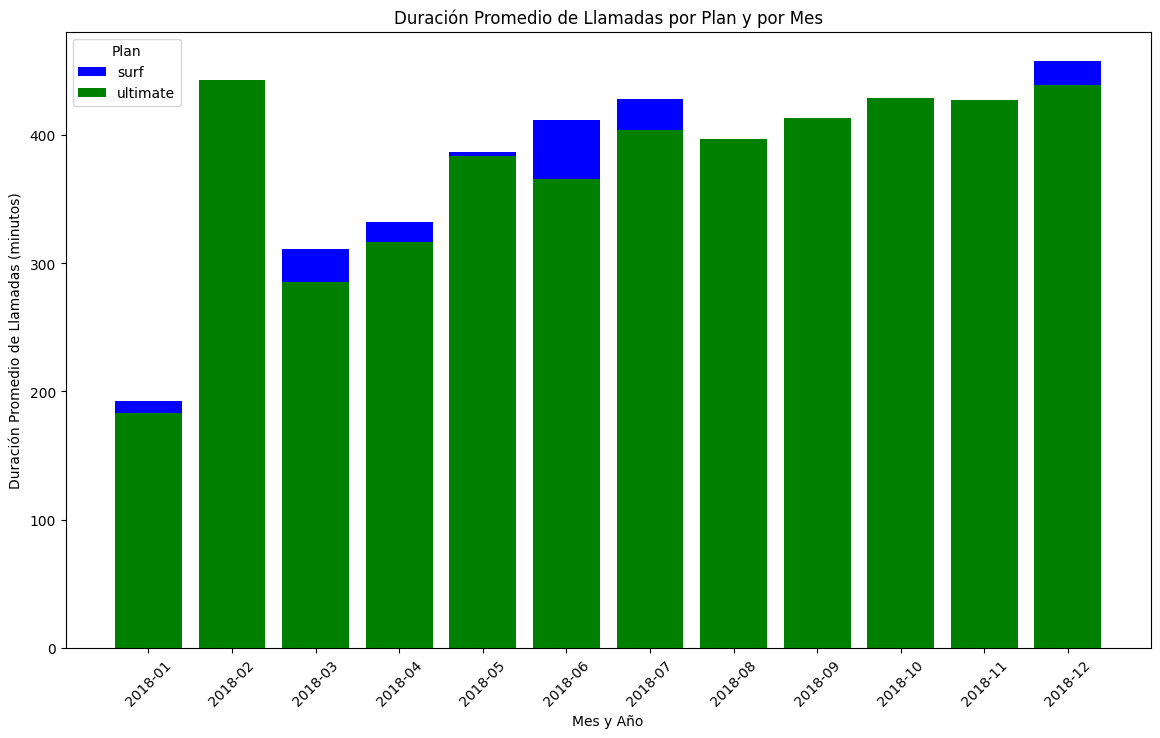

In [28]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# year_month es un string para facilitar la visualización
df_user_data['year_month'] = df_user_data['year_month'].astype(str)

# Agrupar por plan y año_mes, y calcular la duración promedio de las llamadas
avg_call_duration = df_user_data.groupby(['plan', 'year_month'])['minutes_per_month'].mean().reset_index()

# Crear el gráfico de barras
pl.figure(figsize=(14, 8))

# Crear una lista de colores para los diferentes planes
plan_colors = {'surf': 'blue', 'ultimate': 'green'}

# Agrupar por plan para crear gráficos de barras separados
for plan in avg_call_duration['plan'].unique():
    subset = avg_call_duration[avg_call_duration['plan'] == plan]
    pl.bar(subset['year_month'], subset['minutes_per_month'], color=plan_colors[plan], label=plan)

# Configurar etiquetas y título
pl.xlabel('Mes y Año')
pl.ylabel('Duración Promedio de Llamadas (minutos)')
pl.title('Duración Promedio de Llamadas por Plan y por Mes')
pl.xticks(rotation=45)
pl.legend(title='Plan')

# Mostrar el gráfico
pl.show()

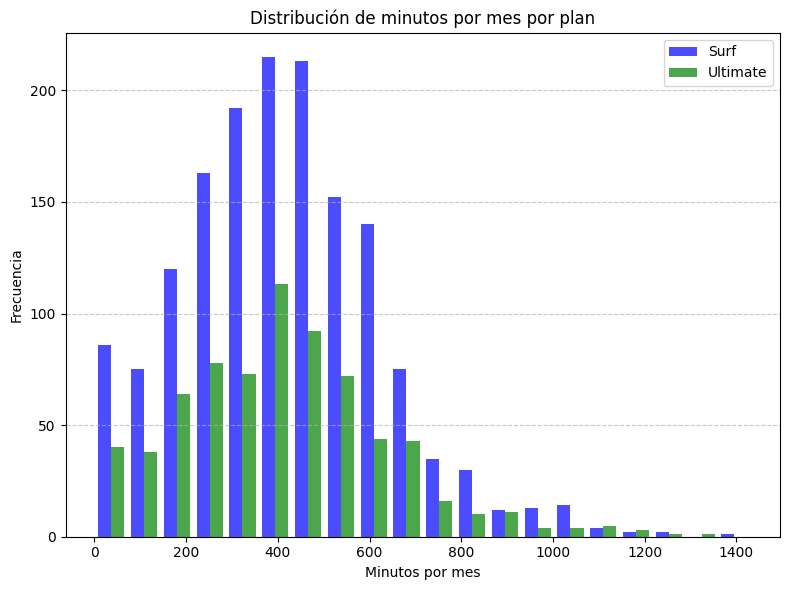

In [29]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Filtramos los datos para obtener los minutos por mes para cada plan
surf_minutes = df_user_data[df_user_data['plan'] == 'surf']['minutes_per_month'].dropna()
ultimate_minutes = df_user_data[df_user_data['plan'] == 'ultimate']['minutes_per_month'].dropna()

# Configuramos el histograma
pl.figure(figsize=(8, 6))
pl.hist([surf_minutes, ultimate_minutes], bins=20, color=['blue', 'green'], alpha=0.7, label=['Surf', 'Ultimate'])
pl.title('Distribución de minutos por mes por plan')
pl.xlabel('Minutos por mes')
pl.ylabel('Frecuencia')
pl.legend()
pl.grid(axis='y', linestyle='--', alpha=0.7)
pl.tight_layout()
pl.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [30]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Se utiliza .dropna() para eliminar cualquier fila que tenga un valor faltante en la columna 
# de duración mensual de llamadas. 

# Filtramos los datos para obtener la duración mensual de las llamadas para cada plan
surf_call_duration = df_user_data[df_user_data['plan'] == 'surf']['minutes_per_month'].dropna()
ultimate_call_duration = df_user_data[df_user_data['plan'] == 'ultimate']['minutes_per_month'].dropna()

# Calculamos la media y la varianza para cada plan
surf_mean_duration = np.mean(surf_call_duration)
surf_variance_duration = np.var(surf_call_duration)

ultimate_mean_duration = np.mean(ultimate_call_duration)
ultimate_variance_duration = np.var(ultimate_call_duration)

# Imprimimos los resultados
print("Plan Surf:")
print("Media de duración mensual de llamadas:", surf_mean_duration)
print("Varianza de duración mensual de llamadas:", surf_variance_duration)

print("\nPlan Ultimate:")
print("Media de duración mensual de llamadas:", ultimate_mean_duration)
print("Varianza de duración mensual de llamadas:", ultimate_variance_duration)


Plan Surf:
Media de duración mensual de llamadas: 412.364792746114
Varianza de duración mensual de llamadas: 46891.19292184823

Plan Ultimate:
Media de duración mensual de llamadas: 410.75705056179777
Varianza de duración mensual de llamadas: 50273.99586405362


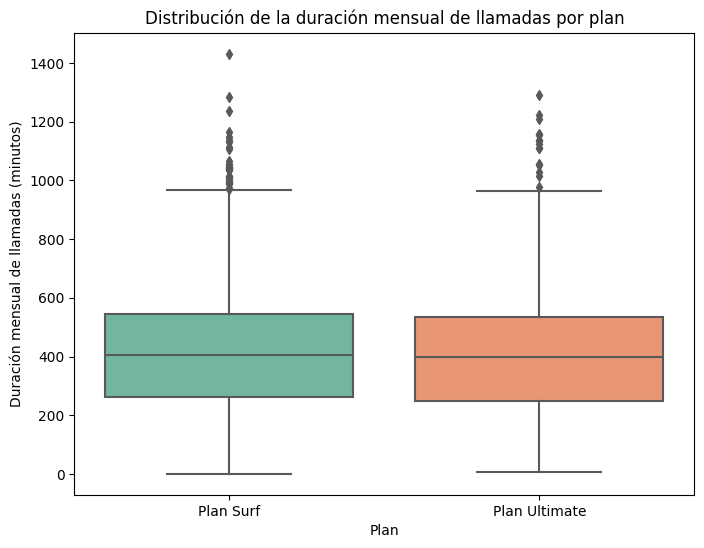

In [31]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Creamos un DataFrame con los datos de duración mensual de llamadas para cada plan
data = pd.DataFrame({'Plan Surf': surf_call_duration, 'Plan Ultimate':ultimate_call_duration})

# Trazamos el diagrama de caja
pl.figure(figsize=(8, 6))
sns.boxplot(data=data, palette='Set2')
pl.title('Distribución de la duración mensual de llamadas por plan')
pl.ylabel('Duración mensual de llamadas (minutos)')
pl.xlabel('Plan')
pl.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

<font color='#571EEB'>Al realizar un análisis sobre el comportamiento de los usuarios con respecto al promedio de llamadas en 7 meses del año los usuarios del plan surf tienen a ocupar más minutos. Además, la distribución de los mensajes para el plan surf tiende a ser mayor, debido a la observació anterior. Sin embargo, las medias de las dos distribuciones tienden a ser casi iguales, con la única diferencia de que en el plan suft existen más valores atípicos.   

### Mensajes

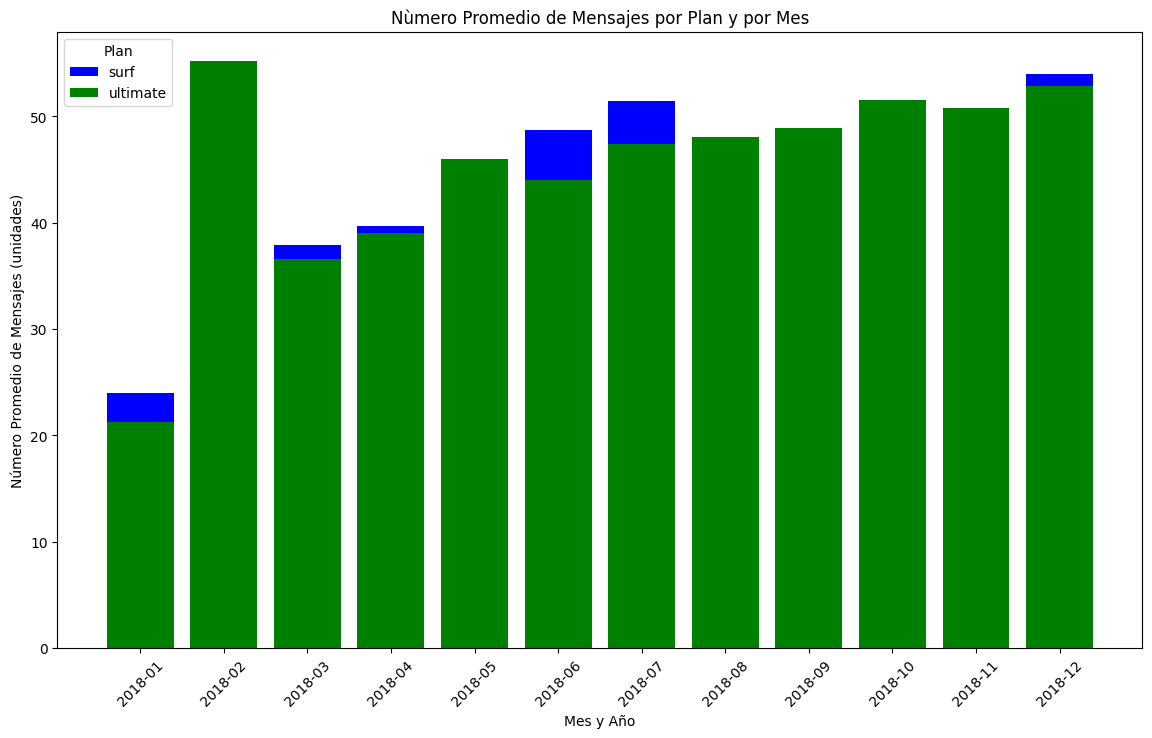

In [32]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# year_month es un string para facilitar la visualización
df_user_data['year_month'] = df_user_data['year_month'].astype(str)

# Agrupar por plan y año_mes, y calcular el promedio de mensajes que envìa cada usuario. 
avg_messages_num = df_user_data.groupby(['plan', 'year_month'])['num_messages'].mean().reset_index()

# Crear el gráfico de barras
pl.figure(figsize=(14, 8))

# Crear una lista de colores para los diferentes planes
plan_colors = {'surf': 'blue', 'ultimate': 'green'}

# Agrupar por plan para crear gráficos de barras separados
for plan in avg_messages_num['plan'].unique():
    subset = avg_messages_num[avg_messages_num['plan'] == plan]
    pl.bar(subset['year_month'], subset['num_messages'], color=plan_colors[plan], label=plan)

# Configurar etiquetas y título
pl.xlabel('Mes y Año')
pl.ylabel('Número Promedio de Mensajes (unidades)')
pl.title('Nùmero Promedio de Mensajes por Plan y por Mes')
pl.xticks(rotation=45)
pl.legend(title='Plan')

# Mostrar el gráfico
pl.show()

In [33]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

<font color='#571EEB'>Al realizar un análisis sobre el comportamiento de los usuarios con respecto a las llamadas, se puede concluir que el comportamiento de los usuarios en cuanto a el nùmero de mensajes se refiere no varia mucho entre mes. Por otro lado, a utilización de megabites se refiere los datos siguen una distribución normal, casi con los mismos valores para los cuartiles y media. Sin embargo, se puede decir que existen más valores atípicos en el plan surf.</font> 

### Internet

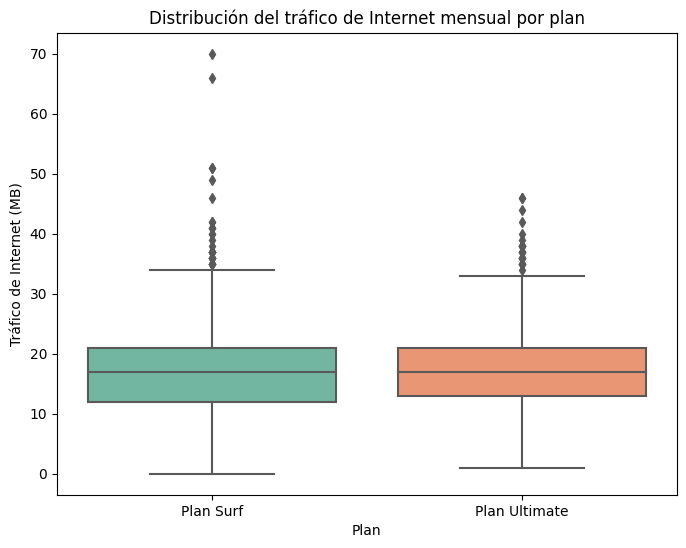

In [34]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Filtramos los datos para obtener la cantidad de tráfico de Internet por plan
surf_internet_traffic = df_user_data[df_user_data['plan'] == 'surf']['internet_traffic_gb'].dropna()
ultimate_internet_traffic = df_user_data[df_user_data['plan'] == 'ultimate']['internet_traffic_gb'].dropna()

# Creamos un DataFrame con los datos de tráfico de Internet para cada plan
data_internet = pd.DataFrame({'Plan Surf': surf_internet_traffic, 'Plan Ultimate': ultimate_internet_traffic})

# Trazamos el diagrama de caja
pl.figure(figsize=(8, 6))
sns.boxplot(data=data_internet, palette='Set2')
pl.title('Distribución del tráfico de Internet mensual por plan')
pl.ylabel('Tráfico de Internet (MB)')
pl.xlabel('Plan')
pl.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

<font color='#571EEB'>Al realizar un análisis sobre el comportamiento de los usuarios con respecto a las llamadas, se puede concluir que el comportamiento de los usuarios en cuanto a el nùmero de mensajes se refiere no varia mucho entre mes. Por otro lado, a utilización de megabites se refiere los datos siguen una distribución normal, casi con los mismos valores para los cuartiles y media. Sin embargo, se puede decir que existen más valores atípicos en el plan surf.</font>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [35]:
# Filtrar los datos para obtener los ingresos por plan
surf_ingresos = df_user_data[df_user_data['plan'] == 'surf']['total_cost'].dropna()
ultimate_ingresos = df_user_data[df_user_data['plan'] == 'ultimate']['total_cost'].dropna()

# Calcular estadísticas descriptivas
surf_stats = surf_ingresos.describe()
ultimate_stats = ultimate_ingresos.describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas para el plan Surf:")
print(surf_stats)

print("\nEstadísticas descriptivas para el plan Ultimate:")
print(ultimate_stats)

Estadísticas descriptivas para el plan Surf:
count    1544.000000
mean       38.071565
std        77.705028
min      -130.000000
25%        -9.640000
50%        40.075000
75%        80.120000
max       588.277200
Name: total_cost, dtype: float64

Estadísticas descriptivas para el plan Ultimate:
count    712.000000
mean     -18.247191
std       52.923697
min     -133.000000
25%      -49.000000
50%      -21.000000
75%        7.000000
max      182.000000
Name: total_cost, dtype: float64


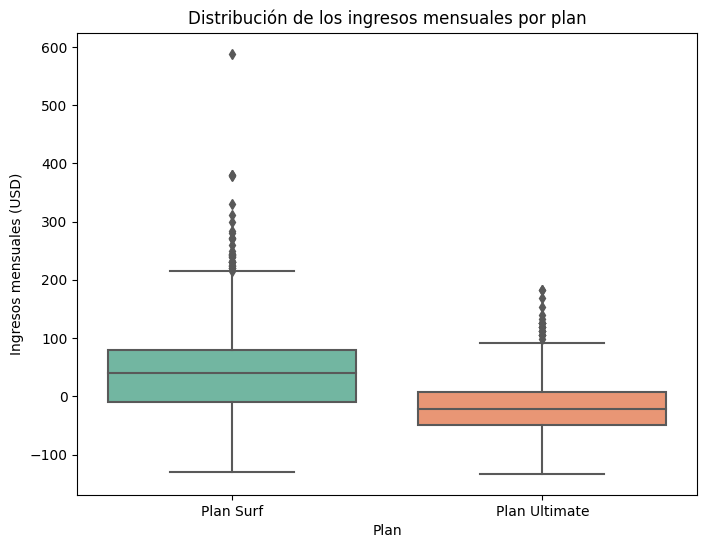

In [36]:
# Crear un DataFrame con los ingresos por plan
data_ingresos = pd.DataFrame({'Plan Surf': surf_ingresos, 'Plan Ultimate': ultimate_ingresos})

# Trazar el diagrama de caja
pl.figure(figsize=(8, 6))
sns.boxplot(data=data_ingresos, palette='Set2')
pl.title('Distribución de los ingresos mensuales por plan')
pl.ylabel('Ingresos mensuales (USD)')
pl.xlabel('Plan')
pl.show()

In [37]:
# Comparar las medias y las varianzas
surf_mean = surf_ingresos.mean()
ultimate_mean = ultimate_ingresos.mean()

surf_variance = surf_ingresos.var()
ultimate_variance = ultimate_ingresos.var()

print(f"Media de ingresos mensuales del plan Surf: {surf_mean}")
print(f"Varianza de ingresos mensuales del plan Surf: {surf_variance}")

print(f"Media de ingresos mensuales del plan Ultimate: {ultimate_mean}")
print(f"Varianza de ingresos mensuales del plan Ultimate: {ultimate_variance}")

Media de ingresos mensuales del plan Surf: 38.071564507772024
Varianza de ingresos mensuales del plan Surf: 6038.071374452402
Media de ingresos mensuales del plan Ultimate: -18.247191011235955
Varianza de ingresos mensuales del plan Ultimate: 2800.9177136174717


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

<font color='#571EEB'>Al realizar un análisis sobre los ingresos de los diferentes planes, se tiene que los usuarios del plan Surf tienen a ocupar mas internet, minutos de llamadas y mensajes pasandose del límite del plan, haciendo que tengan que pagar mucho más. En cambio para los usuarios del plan Ultimate rara vez se pasan de los límites del plan.</font>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [38]:
# Prueba las hipótesis

from scipy import stats as st

#Formular las Hipòtesis= 
# Hipótesis nula (H0): Los ingresos promedio de los usuarios del plan Ultimate son iguales a los 
# ingresos promedio de los usuarios del plan Surf.

# Hipótesis alternativa (H1): Los ingresos promedio de los usuarios del plan Ultimate son 
# diferentes de los ingresos promedio de los usuarios del plan Surf.

# Se necesitarà realizar una Hipótesis sobre la igualdad de las medias de dos poblaciones.

# Filtrar los datos para obtener los ingresos por plan
surf_ingresos = df_user_data[df_user_data['plan'] == 'surf']['total_cost'].dropna()
ultimate_ingresos = df_user_data[df_user_data['plan'] == 'ultimate']['total_cost'].dropna()

# Realizar la prueba t para muestras independientes
t_stat, p_value = st.ttest_ind(surf_ingresos, ultimate_ingresos, equal_var=False)  # Usamos equal_var=False porque las varianzas son diferentes

# Imprimir los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determinar si rechazamos o no la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes entre los planes Ultimate y Surf.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes entre los planes Ultimate y Surf.")

T-statistic: 20.108018492070524
P-value: 7.5501835556955e-82
Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes entre los planes Ultimate y Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:
# Prueba las hipótesis

#Necesito extraer la columna city de df_users e incluirla en mi dataframe "df_user_data"

# Selecciona solo la columna 'user_id' y 'city' de df_users
df_users_city = df_users[['user_id', 'city']]

# Realiza la fusión
df_user_data = pd.merge(df_user_data, df_users_city, on='user_id', how='left')

#Formular las Hipòtesis= 
# Hipótesis nula (H0): El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso 
# promedio de los usuarios de otras regiones.

# Hipótesis alternativa (H1): El ingreso promedio de los usuarios del área NY-NJ es diferente al
# ingreso promedio de los usuarios de otras regiones 

# Se necesitarà realizar una Hipótesis sobre la igualdad de las medias de dos poblaciones.

# Filtrar los datos para obtener los ingresos por región
ny_nj_ingresos = df_user_data[df_user_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_cost'].dropna()
otras_regiones_ingresos = df_user_data[df_user_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_cost'].dropna()

# Realizar la prueba t para muestras independientes
t_stat, p_value = st.ttest_ind(ny_nj_ingresos, otras_regiones_ingresos, equal_var=False)  # Usamos equal_var=False porque las varianzas pueden ser diferentes

# Imprimir los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determinar si rechazamos o no la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes entre NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes entre NY-NJ y otras regiones.")


T-statistic: 2.4715068148188593
P-value: 0.013750023076515456
Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes entre NY-NJ y otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

<font color='#571EEB'>Como conclusiones generales se tiene: 
 a.- El plan suft tiene a generar muchos más ingresos que el plan ultimate, debido a que los usuarios tienen a sobrepasar los límites de cada uno de los servicios antes de empezar a cobrar extras.   
 b.- Aun que no se haya realizado un análisis exhaustivo de que plan genera la mayor parte de las ganancias en el estado de New York-Newark-Jersey City, si se puede decir, que los usuarios de este estado los ingresos son significativamente diferentes a otras regiones del país.   
 c.- Aun que la distribución de la duración mensual de llamadas por plan tienden a ser relativamente iguales, el plan surf tiene a generar mas ingresos por la mayor cantidad de valores atípicos. Es decir, existe mayor cantidad de usuarios que sobrepasan los límites del plan.   
 d.- Para incrementar las ganancias de la empresa, se puede considerar varias estrategias basadas en el análisis de los ingresos: i) Incrementar ligeramente el costo mensual del plan Surf a cambio de aumentar los límites de minutos, SMS y datos incluidos. Esto puede hacer que el plan sea más atractivo para los usuarios que actualmente exceden sus límites y pagan cargos adicionales. ii) Mantener el costo mensual igual, pero reducir los cargos por excedentes. Esto podría atraer a más usuarios al plan Surf, especialmente aquellos que temen los cargos adicionales. iii) Dado que hay una gran diferencia en precio y beneficios entre Surf y Ultimate, podría ser beneficioso crear un plan intermedio que cubra las necesidades de usuarios que necesitan más de lo que ofrece Surf pero no tanto como lo que ofrece Ultimate.

</font>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>